# Label font metrics

crude but probably sufficient method to extract font metrics to estimate axis label extents from strings

In [1]:
from tikz import Picture, Raw
import numpy as np

## Create special `Figure` that outputs node width and height

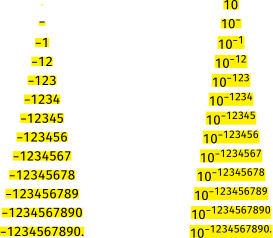

In [2]:
# characters that can occur in labels:
cs = '-1234567890.'

# code to measure nodes, writes width and height to LaTeX output
codelines = [
    r'\newcommand{\typewh}[1]{',
    r'  \pgfpointdiff{\pgfpointanchor{#1}{south west}}{\pgfpointanchor{#1}{north east}}',
    r'  \pgfgetlastxy{\mywidth}{\myheight}',
    r'  \typeout{PyTikZ: \mywidth, \myheight}',
    r'}']

font_size = 10

pic = Picture()
pic.fira()          # use Fira Math
pic.add_preamble('\n'.join(codelines))
pic._append(Raw(rf'\fontsize{{{font_size}pt}}{{{font_size}pt}}\selectfont'))
# regular decimal labels
for i in range(len(cs) + 1):
    s = cs[: i]
    # create node
    pic.node(f'${s}$', fill='yellow', at=(5, 11 - i / 2), name='n',
        inner_sep=0, outer_sep=0)
    # measure node
    pic._append(Raw(r'\typewh{n}'))
# decadic power labels
for i in range(len(cs) + 1):
    s = cs[: i]
    # create node
    pic.node(f'$10^{{{s}}}$', fill='yellow', at=(10, 11 - i / 2), name='n',
        inner_sep=0, outer_sep=0)
    # measure node
    pic._append(Raw(r'\typewh{n}'))

pic

## Process LaTeX output to compute metrics

In [3]:
# extract values
ws = []
hs = []
for l in pic.latex_completed.stdout.splitlines():
    if l.startswith('PyTikZ: '):
        line = l[8:].replace('pt', '')
        w, h = eval(line)
        ws.append(w)
        hs.append(h)
wsl = ws[: len(cs) + 1]
wsp = ws[len(cs) + 1 :]
hsl = hs[: len(cs) + 1]
hsp = hs[len(cs) + 1 :]

# compute metrics of regular decimal labels
w = np.array(wsl) / font_size
label_metrics = dict()
label_metrics['offset'] = round(w[0], ndigits=3)
wd = np.diff(w)
for i, c in enumerate(cs):
    label_metrics[c] = round(wd[i], ndigits=3)
h = np.array(hsl) / font_size
label_metrics['height'] = round(max(h), ndigits=3)

# compute metrics of decadic power labels
# These metrics are actually not (yet) used.
w = np.array(wsp) / font_size
power_label_metrics = dict()
power_label_metrics['offset'] = round(w[0], ndigits=3)
wd = np.diff(w)
for i, c in enumerate(cs):
    power_label_metrics[c] = round(wd[i], ndigits=3)
h = np.array(hsp) / font_size
power_label_metrics['height'] = round(max(h), ndigits=3)

## Print metrics

This can be copy-and-pasted into Python code.

In [4]:
print('label_metrics =', label_metrics)
print('power_label_metrics =', power_label_metrics)

label_metrics = {'offset': 0.1, '-': 0.4, '1': 0.56, '2': 0.56, '3': 0.56, '4': 0.56, '5': 0.56, '6': 0.56, '7': 0.56, '8': 0.56, '9': 0.56, '0': 0.56, '.': 0.24, 'height': 0.723}
power_label_metrics = {'offset': 1.17, '-': 0.4, '1': 0.448, '2': 0.448, '3': 0.448, '4': 0.448, '5': 0.448, '6': 0.448, '7': 0.448, '8': 0.448, '9': 0.448, '0': 0.448, '.': 0.192, 'height': 0.973}


## Example 1

Compute extent of label '$-25$' in units of font size.

In [5]:
sum(map(label_metrics.get, '-25')) + label_metrics['offset'], label_metrics['height']

(1.62, 0.723)

## Example 2

Compute extent of label '$10^{-7}$' in units of font size.

In [6]:
sum(map(power_label_metrics.get, '-7')) + power_label_metrics['offset'], power_label_metrics['height']

(2.018, 0.973)